In [ ]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv("final_categorized_merged.csv")

# Display the DataFrame
display(df)


,Tarih,dayOfWeek,Total Spending,Total Income,Discretionary Amount,Essential Amount,Share of Discretionary
0,2022-11-01,Tuesday,-143.000000,2500.0,-103.0,-40.000000,0.720280
1,2022-11-02,Wednesday,-110.000000,0.0,-110.0,0.000000,1.000000
2,2022-11-03,Thursday,-79.250000,0.0,0.0,-79.250000,-0.000000
3,2022-11-04,Friday,-188.400000,750.0,-75.0,-113.400000,0.398089
4,2022-11-05,Saturday,-89.500000,0.0,-25.0,-64.500000,0.279330
...,...,...,...,...,...,...,...
436,2024-12-08,Sunday,-885.800000,0.0,-400.0,-485.800000,0.451569
437,2024-12-09,Monday,-583.333333,0.0,-250.0,-333.333333,0.428571
438,2024-12-10,Tuesday,-461.500000,0.0,-440.0,-21.500000,0.953413
439,2024-12-12,Thursday,-984.623333,0.0,0.0,-984.623333,-0.000000


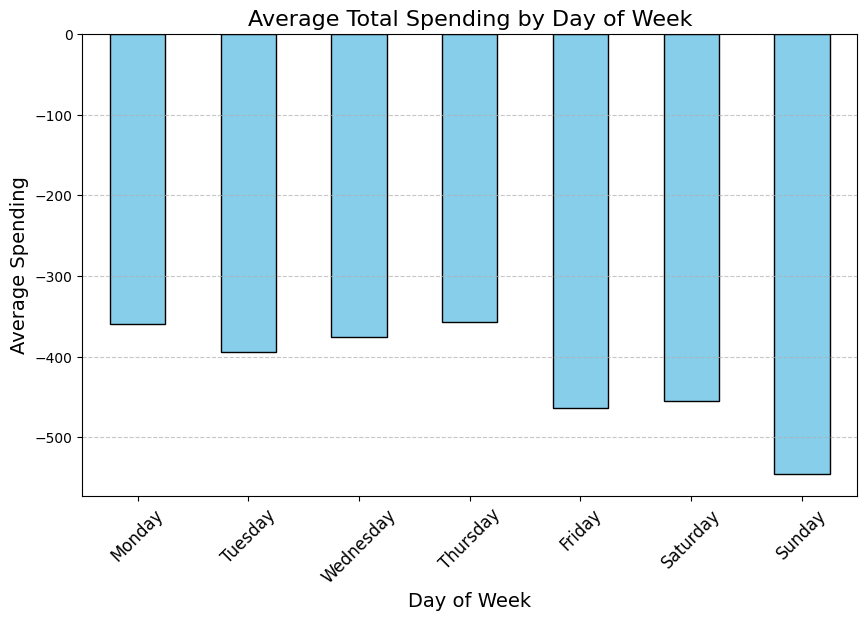

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Group by 'dayOfWeek' and calculate average Total Spending
day_of_week_spending = df.groupby('dayOfWeek')['Total Spending'].mean()

# Sort dayOfWeek in the correct order
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_spending = day_of_week_spending.reindex(day_of_week_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
day_of_week_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Spending by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


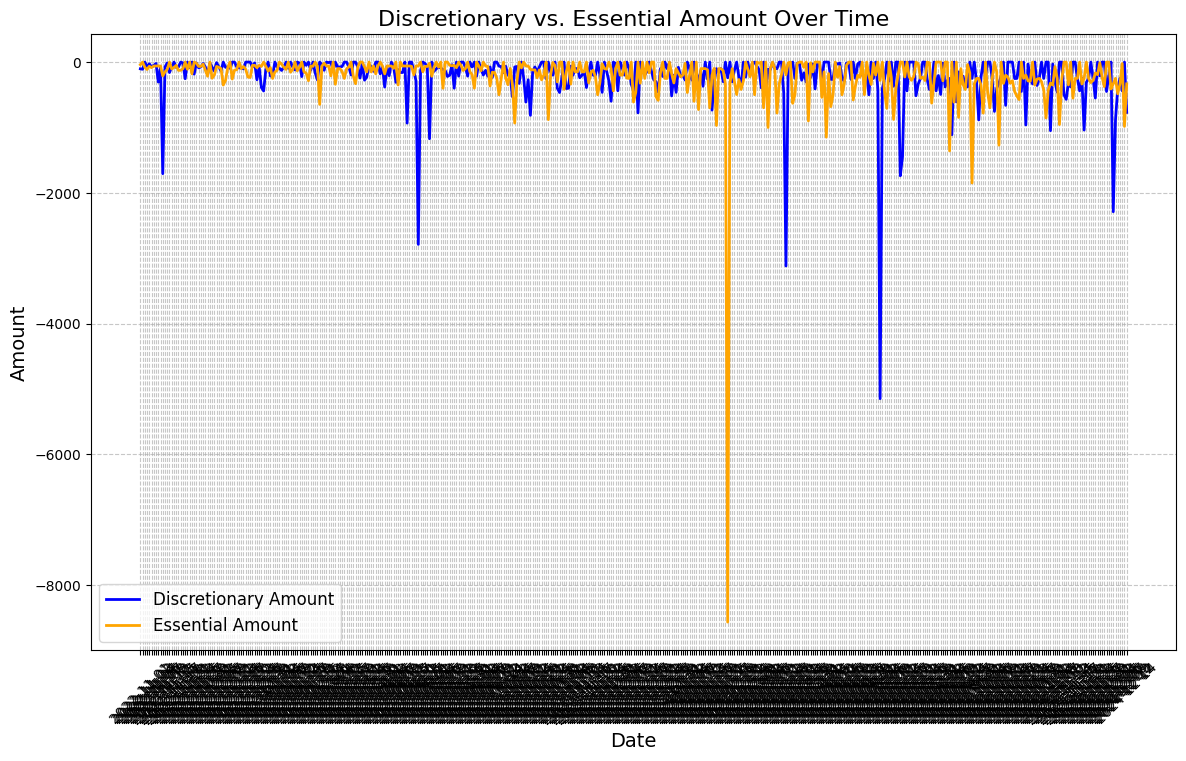

In [ ]:
# Plot discretionary and essential amounts over time
plt.figure(figsize=(14, 8))

# Plot Discretionary Amount
plt.plot(df['Tarih'], df['Discretionary Amount'], label='Discretionary Amount', color='blue', linewidth=2)

# Plot Essential Amount
plt.plot(df['Tarih'], df['Essential Amount'], label='Essential Amount', color='orange', linewidth=2)

# Add titles and labels
plt.title('Discretionary vs. Essential Amount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(linestyle='--', alpha=0.7)

# Show the plot
plt.show()


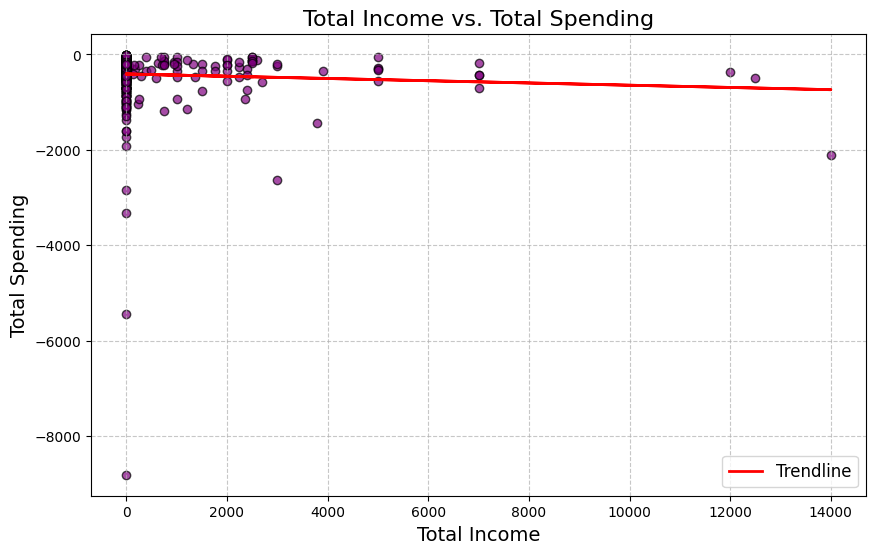

In [ ]:
import numpy as np  # Import numpy

# Scatter plot for Income vs. Spending
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df['Total Income'], df['Total Spending'], alpha=0.7, color='purple', edgecolor='k')

# Add titles and labels
plt.title('Total Income vs. Total Spending', fontsize=16)
plt.xlabel('Total Income', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)

# Add a trendline
z = np.polyfit(df['Total Income'], df['Total Spending'], 1)
p = np.poly1d(z)
plt.plot(df['Total Income'], p(df['Total Income']), color='red', linewidth=2, label='Trendline')

plt.legend(fontsize=12)
plt.show()


In [ ]:
# Define the four divisor dates
divisor_dates = ['16.02.2023', '1.10.2023', '15.02.2024', '25.09.2024']  # Replace with your actual dates
divisor_dates = pd.to_datetime(divisor_dates)  # Ensure dates are in datetime format

# Convert 'Tarih' column to datetime if not already
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Function to assign Economic Period based on the date
def assign_economic_period(date):
    if date < divisor_dates[0]:
        return 'Period 1'
    elif date < divisor_dates[1]:
        return 'Period 2'
    elif date < divisor_dates[2]:
        return 'Period 3'
    elif date < divisor_dates[3]:
        return 'Period 4'
    else:
        return 'Period 5'

# Apply the function to create the new column
df['Economic Period'] = df['Tarih'].apply(assign_economic_period)

# Display the updated DataFrame
print(df.head())
# Group by 'Economic Period' and find the first and last dates for each period
period_summary = df.groupby('Economic Period')['Tarih'].agg(['min', 'max']).reset_index()

# Rename the columns for clarity
period_summary.columns = ['Economic Period', 'Start Date', 'End Date']

# Display the summary
print(period_summary)


       Tarih  dayOfWeek  Total Spending  Total Income  Discretionary Amount  \
0 2022-11-01    Tuesday         -143.00        2500.0                -103.0   
1 2022-11-02  Wednesday         -110.00           0.0                -110.0   
2 2022-11-03   Thursday          -79.25           0.0                   0.0   
3 2022-11-04     Friday         -188.40         750.0                 -75.0   
4 2022-11-05   Saturday          -89.50           0.0                 -25.0   

   Essential Amount  Share of Discretionary Economic Period  
0            -40.00                0.720280        Period 1  
1              0.00                1.000000        Period 1  
2            -79.25               -0.000000        Period 1  
3           -113.40                0.398089        Period 1  
4            -64.50                0.279330        Period 1  
  Economic Period Start Date   End Date
0        Period 1 2022-11-01 2023-01-21
1        Period 2 2023-02-16 2023-06-14
2        Period 3 2023-10-01 2024

<ipython-input-8-9a817b5566aa>:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  divisor_dates = pd.to_datetime(divisor_dates)  # Ensure dates are in datetime format


In [ ]:
# Step 1: Create a copy of the original DataFrame
df_weekly = df.copy()

# Step 2: Add a 'Week' column to the copied DataFrame
df_weekly['Week'] = df_weekly['Tarih'].dt.to_period('W').apply(lambda r: r.start_time)  # Extract start of the week

# Step 3: Group by 'Week' and aggregate the fields
weekly_data = df_weekly.groupby('Week').agg({
    'Total Spending': 'sum',
    'Total Income': 'sum',
    'Discretionary Amount': 'sum',
    'Essential Amount': 'sum'
}).reset_index()

# Step 4: Calculate 'Share of Discretionary' for each week
weekly_data['Share of Discretionary'] = weekly_data['Discretionary Amount'] / weekly_data['Total Spending']

# Display the weekly aggregated DataFrame
print(weekly_data.head())



        Week  Total Spending  Total Income  Discretionary Amount  \
0 2022-10-31     -770.150000        3252.0               -388.00   
1 2022-11-07    -2836.780000           0.0              -2234.28   
2 2022-11-14     -880.510000        2600.0               -404.90   
3 2022-11-21    -1052.750000           0.0               -537.80   
4 2022-11-28     -993.466667        2500.0               -468.00   

   Essential Amount  Share of Discretionary  
0       -382.150000                0.503798  
1       -602.500000                0.787611  
2       -475.610000                0.459847  
3       -514.950000                0.510853  
4       -525.466667                0.471078  
Economic Period
3    106
2    101
1     83
0     76
4     75
Name: count, dtype: int64


Model Accuracy: 0.30


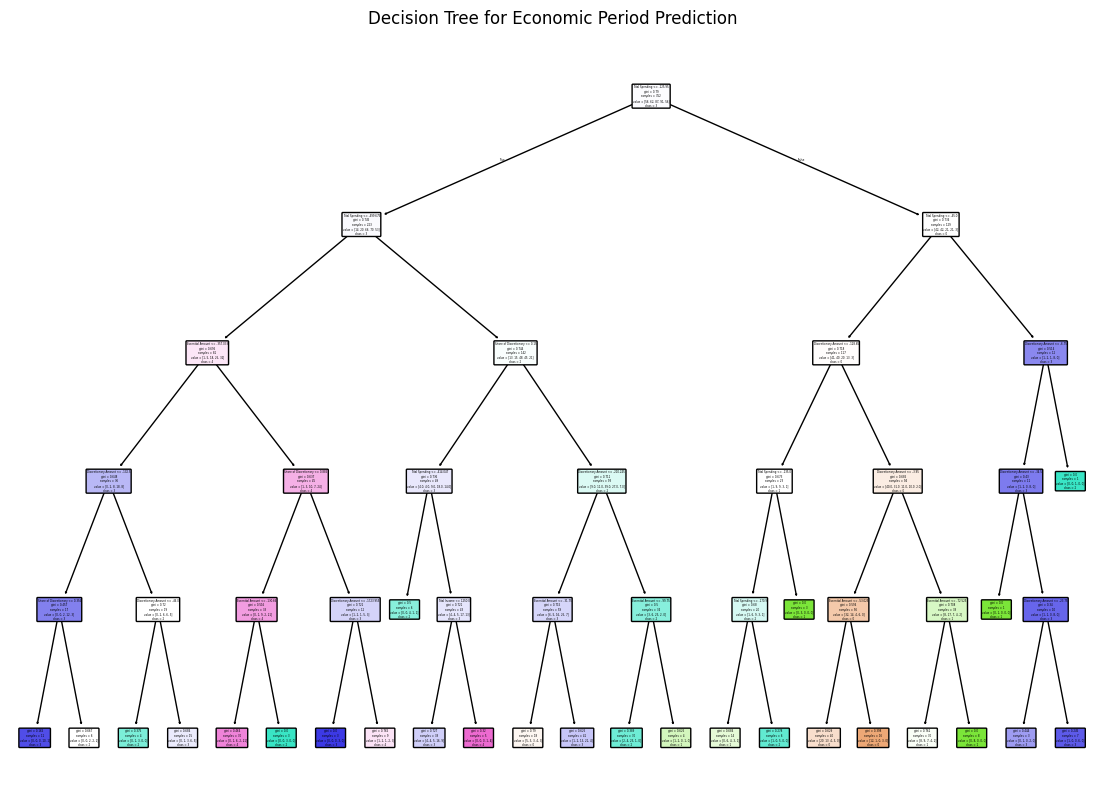

In [ ]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 2: Prepare the data
# Include all relevant columns in model_data
model_data = df_weekly[['Share of Discretionary', 'Total Spending', 'Total Income', 'Discretionary Amount', 'Essential Amount', 'Economic Period']].dropna()

# Encode the target variable ('Economic Period') into numeric labels
model_data['Economic Period'] = model_data['Economic Period'].astype('category').cat.codes

# Step 3: Define features (X) and target (y)
X = model_data[['Share of Discretionary', 'Total Spending', 'Total Income', 'Discretionary Amount', 'Essential Amount']]
y = model_data['Economic Period']  # Target: Economic Period (encoded)

# Step 4: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the decision tree
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
clf.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Step 7: Visualize the decision tree
plt.figure(figsize=(14, 10))
plot_tree(clf, feature_names=X.columns, class_names=model_data['Economic Period'].astype(str).unique(), filled=True, rounded=True)
plt.title('Decision Tree for Economic Period Prediction')
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Cross-Validation Score: 0.42
Tuned Model Accuracy: 0.33


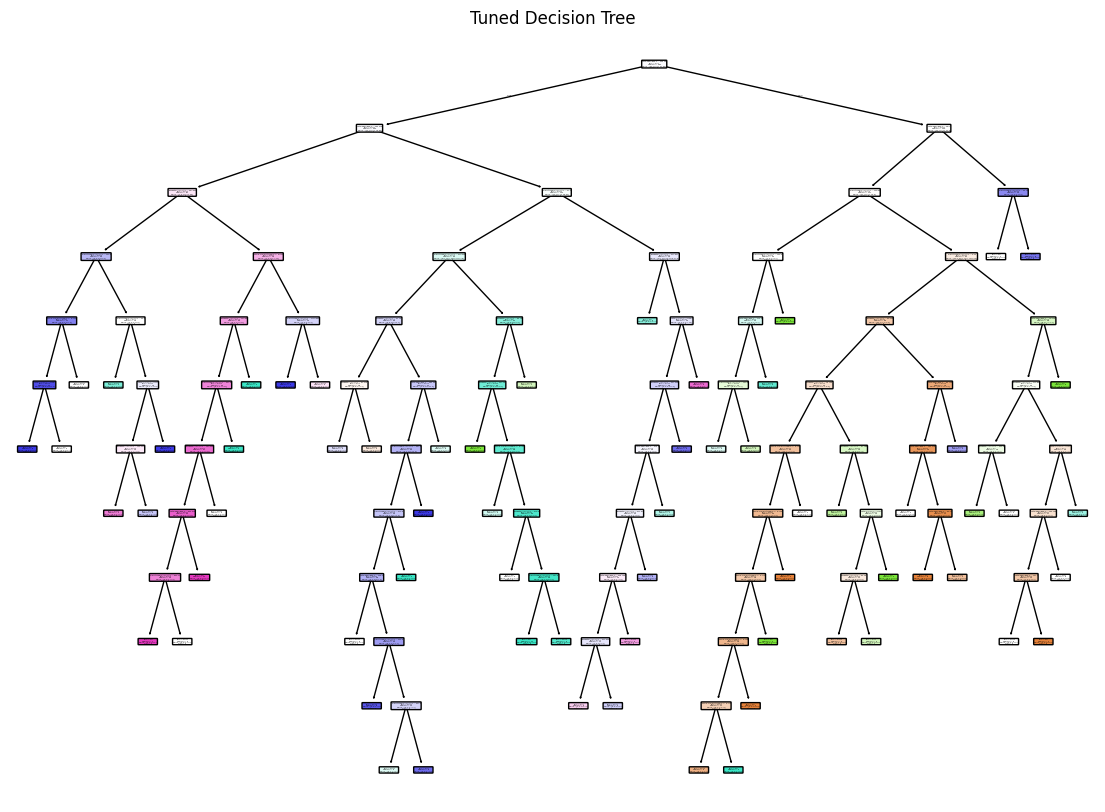

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],          # Depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5]          # Minimum samples required per leaf
}

# Step 2: Initialize the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,          # 5-fold cross-validation
    verbose=1       # Display progress
)

# Step 4: Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Step 6: Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.2f}")

# Step 7: Visualize the best decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=model_data['Economic Period'].astype(str).unique(), filled=True, rounded=True)
plt.title('Tuned Decision Tree')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.45
Tuned Random Forest Accuracy: 0.39


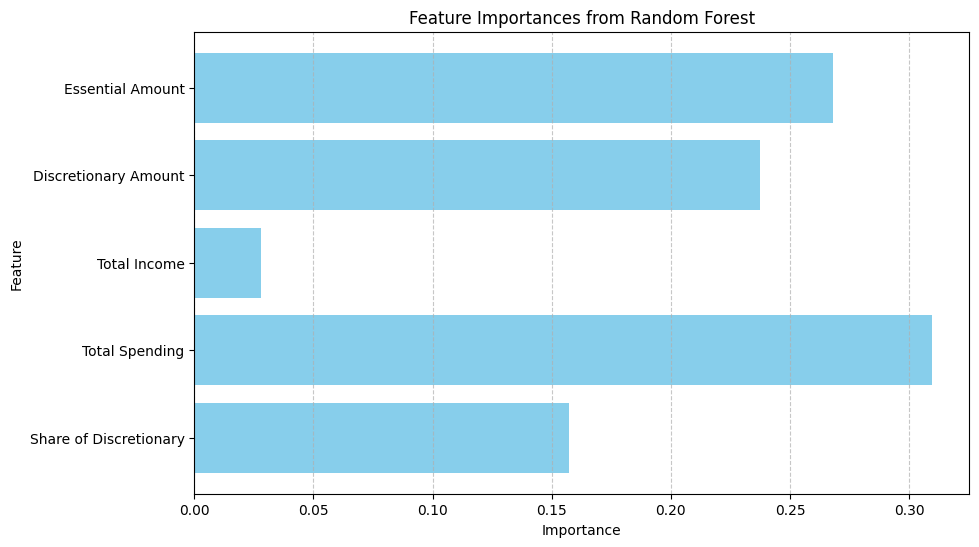

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100],           # Fewer options for number of trees
    'max_depth': [5, 10],               # Reasonable depths to try
    'min_samples_split': [2, 5],        # Reduced number of splits
    'min_samples_leaf': [1, 2],         # Fewer leaf sizes
    'bootstrap': [True]                 # Fixed bootstrap sampling
}

# Step 2: Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,          # 5-fold cross-validation
    verbose=1       # Display progress
)

# Step 4: Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Step 6: Evaluate the best model on the test set
best_rf_clf = grid_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest Accuracy: {accuracy:.2f}")

# Step 7: Feature Importance Visualization
plt.figure(figsize=(10, 6))
feature_importances = best_rf_clf.feature_importances_
plt.barh(X.columns, feature_importances, color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_daily = df.copy()
zero_counts = (df_daily == 0).sum()
print("Number of zero values per column:")
print(zero_counts)


Number of zero values per column:
Tarih                       0
dayOfWeek                   0
Total Spending              0
Total Income              359
Discretionary Amount      117
Essential Amount          100
Share of Discretionary    117
Economic Period             0
dtype: int64


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score: 0.39
Tuned Decision Tree Accuracy: 0.37


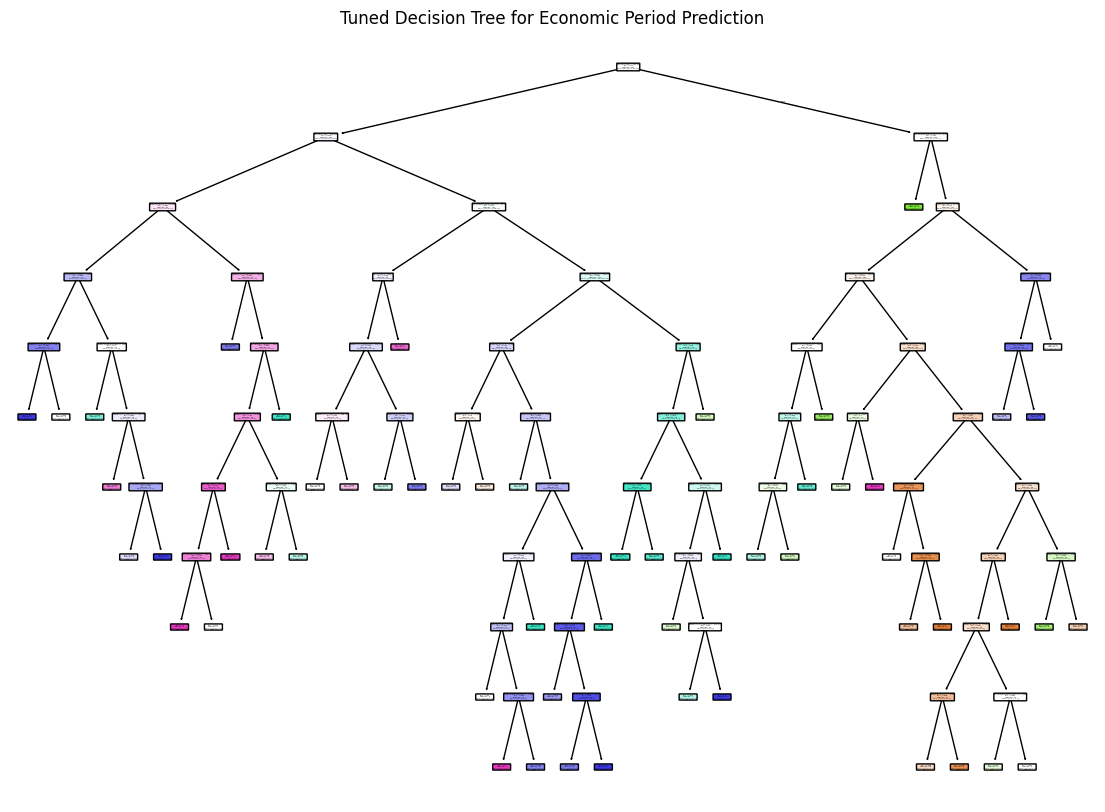

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Create a copy of the original DataFrame
df_daily = df.copy()

# Step 2: Replace 0 values in specific columns with small values
columns_to_convert = ['Total Income', 'Discretionary Amount', 'Essential Amount']
for col in columns_to_convert:
    df_daily[col] = df_daily[col].replace(0, 1)  # Replace 0 with 1

# Special handling for 'Share of Discretionary'
df_daily['Share of Discretionary'] = df_daily['Share of Discretionary'].replace(0, 0.001)  # Replace 0 with 0.001

# Step 3: Feature Engineering
df_daily['Spending to Income Ratio'] = df_daily['Total Spending'] / df_daily['Total Income']
df_daily['Essential Spending Ratio'] = df_daily['Essential Amount'] / df_daily['Total Spending']
df_daily['Discretionary Spending Ratio'] = df_daily['Discretionary Amount'] / df_daily['Total Spending']

# Step 4: Prepare features and target
X = df_daily[['Total Spending', 'Total Income', 'Discretionary Amount', 'Essential Amount',
              'Spending to Income Ratio', 'Essential Spending Ratio', 'Discretionary Spending Ratio']]
y = df_daily['Economic Period'].astype('category').cat.codes  # Encode the target variable

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Hyperparameter Tuning for Decision Tree
param_grid = {
    'max_depth': [3, 5, 10, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split
    'min_samples_leaf': [1, 2, 5]          # Minimum samples required per leaf
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_clf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.2f}")

# Step 7: Evaluate the best model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Decision Tree Accuracy: {accuracy:.2f}")

# Step 8: Visualize the best decision tree
plt.figure(figsize=(14, 10))
plot_tree(best_clf, feature_names=X.columns, class_names=y.astype(str).unique(), filled=True, rounded=True)
plt.title('Tuned Decision Tree for Economic Period Prediction')
plt.show()
